<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Model Development - Used Cars Pricing

## Objectives
After completing this lab you will be able to:

* Develop prediction models

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

* Do I know if the dealer is offering fair value for my trade-in?
* Do I know if I put a fair value on my car?

In data analytics, we often use <strong>Model Development</strong> to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

## Loading libraries and data set

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read data set and save into a dataframe
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(filepath, header=0)

In [3]:
# View the first 5 values of the dataframe
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Linear Regression and Multiple Linear Regression

### Linear Regression

In [4]:
# Load modules for linear regression
from sklearn.linear_model import LinearRegression

In [5]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

#### How could "highway-mpg" help us predict car price?

In [6]:
# Set predictor and response variables
X = df[['highway-mpg']]
Y = df[['price']]

In [7]:
# Fit the model
lm.fit(X,Y)

LinearRegression()

In [11]:
# Output prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [12]:
# Find the value of intercept (a)
lm.intercept_

array([38423.30585816])

In [14]:
# Find the value of slope (b)
lm.coef_

array([[-821.73337832]])

#### Question 1

a.) Create a linear regression objected called "lm1"

In [15]:
lm1 = LinearRegression()
lm1

LinearRegression()

b.) Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [16]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

c.) Find the slope and intercept of the model

In [17]:
lm1.coef_

array([[166.86001569]])

In [18]:
lm1.intercept_

array([-7963.33890628])

d.) What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price"

In [20]:
Yhat=-7963.33 + 166.86 *X
Price=-7963.33 + 166.86 *df['engine-size']

### Multiple Linear Regression

In [21]:
# Develop model using good predicators of price
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [22]:
# Fit the model
lm.fit(Z, df['price'])

LinearRegression()

In [23]:
lm.intercept_

-15806.624626329227

In [24]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [25]:
# Estimated linear model
Yhat=-15806.62 + 53.49 * df['horsepower'] + 4.70 * df['curb-weight'] + 81.53 * df['engine-size'] +36.05 * df['highway-mpg']

#### Question 2

a.) Create and train a Multiple Linear Regression model "lm2" where the response variable is "price" and the predictor variable is "normalized-losses" and "highway-mpg"

In [27]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

b.) Find the coefficient of the model

In [28]:
lm2.coef_

array([   1.49789586, -820.45434016])

## Model evaluation using visualization

In [29]:
# Import the visualization package seaborn
import seaborn as sns
%matplotlib inline

### Regression Plot

(0.0, 48162.72707643183)

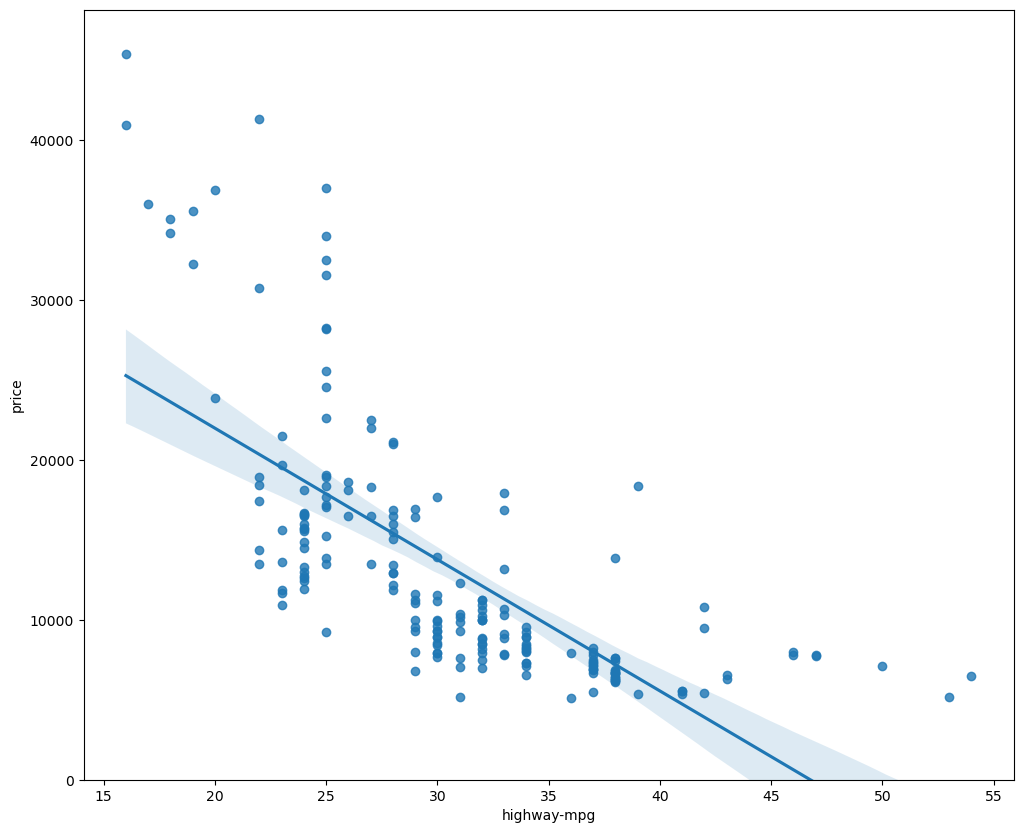

In [32]:
# Create a scatterplot with linear regression line
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

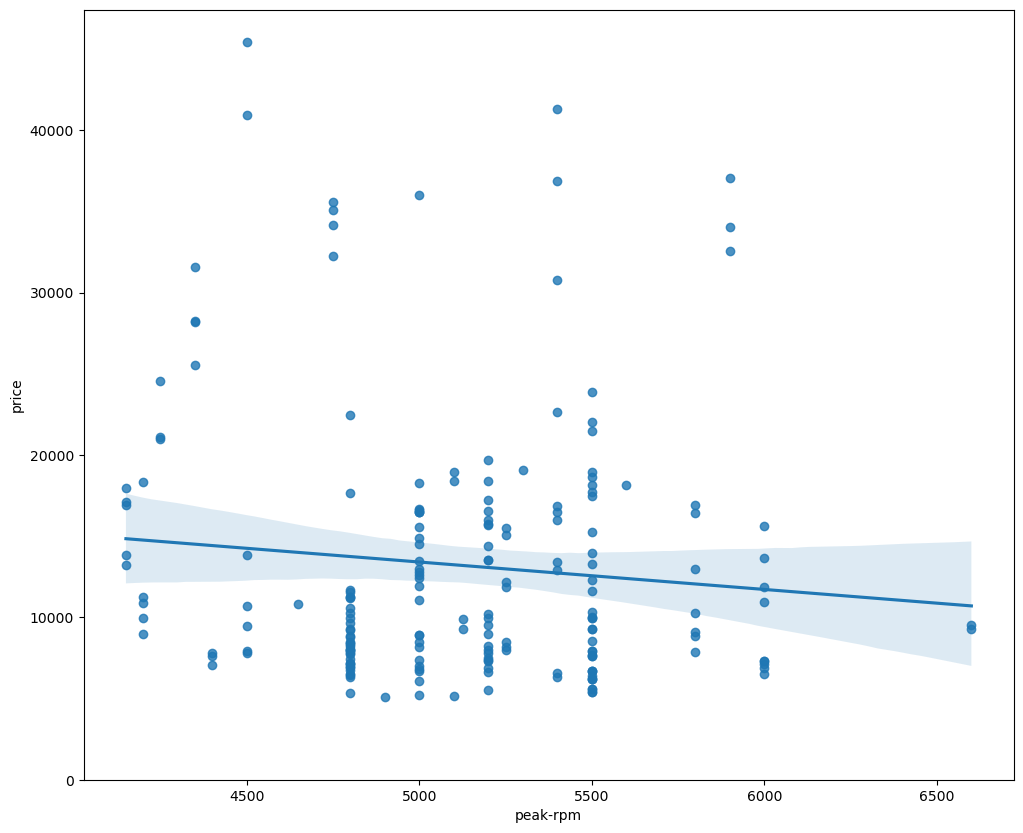

In [33]:
# Create a scatterplot to compare with "peak-rpm"
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

### Question 3

Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" method to verify your answer

In [34]:
# "hightway-mpg" is more strongly correlated with "price", this can be verified using the following:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### Residual Plot

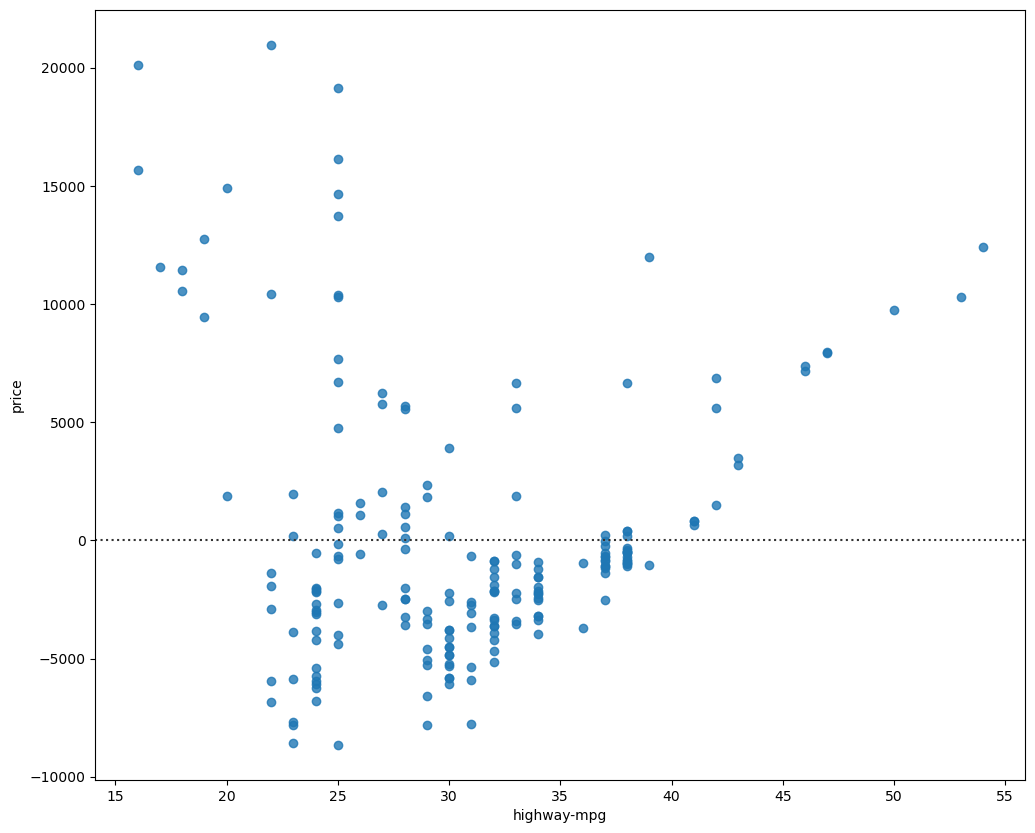

In [36]:
# Create a residual plot based on "highway-mpg" and "price"
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

### Multiple Linear Regression

In [37]:
# Make a prediction
Y_hat = lm.predict(Z)

/var/folders/s2/dcsjmv7s7cndmj1hhw3v6cl00000gn/T/ipykernel_79150/677836722.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/s2/dcsjmv7s7cndmj1hhw3v6cl00000gn/T/ipykernel_79150/677836722.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please a

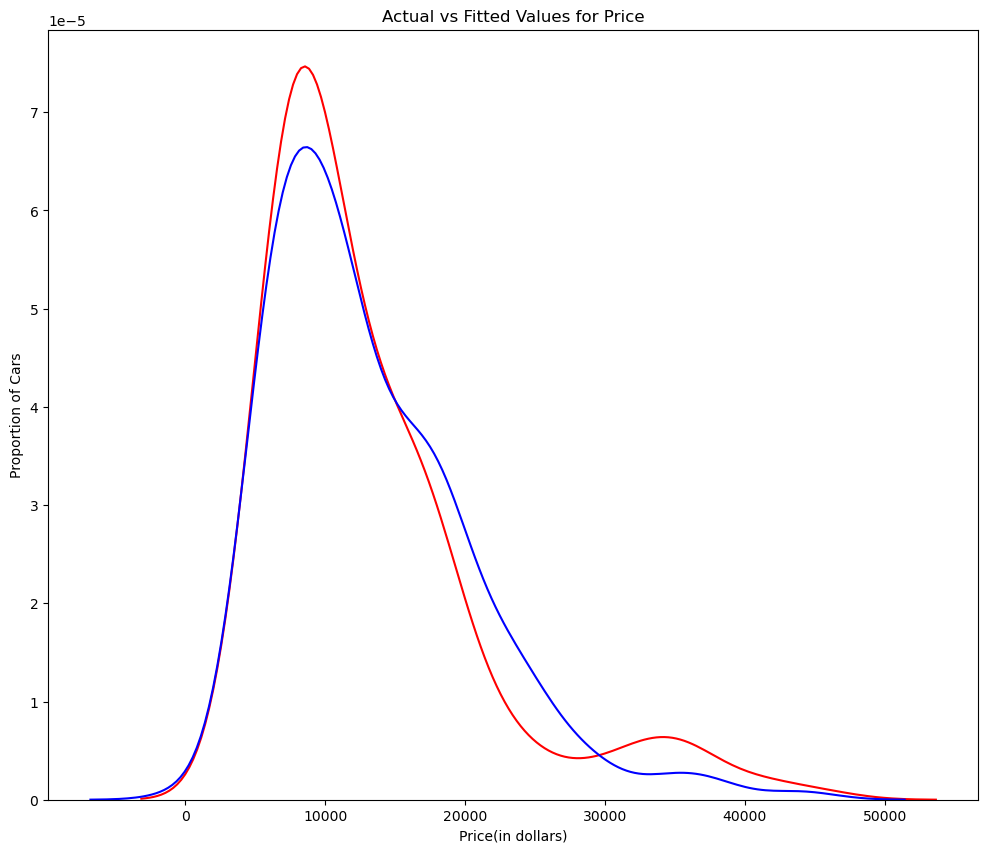

In [41]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

## Polynominal Regression and Pipelines